# Introduction to geopandas (and shapefiles)

Shapefiles are data types that allow us to plot geometries on a map.

[Geopandas](http://geopandas.org/) is an extension of Pandas that allows for operations on geometric types
* Geometric operations are performed by the Shapely library
* Other libraries like [Fiona](https://fiona.readthedocs.io/en/latest/), Descartes, and MatPlotLib are used for plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy

import geopandas
import shapely
import pandas as pd

Note shapefiles come with a handful of associated files with different extensions (for example, ```.shp```, ```.dbf```, and ```shx```).  Read more about them [HERE](https://gisgeography.com/arcgis-shapefile-files-types-extensions/).

**Open up a shape file of California "ecoregions"**

Download these for each state from [https://www.epa.gov/eco-research/level-iii-and-iv-ecoregions-state](https://www.epa.gov/eco-research/level-iii-and-iv-ecoregions-state); they're already in the ```materials/data/shapefiles/``` directory of the current GitHub repository:

In [2]:
ca_eco_gdf = geopandas.read_file('../data/shapefiles/ca_eco_l3/ca_eco_l3.shp')
ca_eco_gdf = geopandas.read_file('../data/shapefiles/ca_eco_l3/ca_eco_l3.shp')

**Note GeoDataFrames typically have a ```.crs``` associated with them (very useful for quick projections):**

In [3]:
print(ca_eco_gdf.crs)

{'init': 'epsg:5070'}


**The first row is actually a pandas Series:**

In [4]:
type(ca_eco_gdf.loc[0])

pandas.core.series.Series

**This Series object has a bunch of columns associated with it (attributes of the given information).  Probably the most important is the ```.geometry``` column:**

US_L3CODE                                                     1
US_L3NAME                                           Coast Range
NA_L3CODE                                                 7.1.8
NA_L3NAME                                           Coast Range
NA_L2CODE                                                   7.1
NA_L2NAME                              MARINE WEST COAST FOREST
NA_L1CODE                                                     7
NA_L1NAME                              MARINE WEST COAST FOREST
STATE_NAME                                           California
EPA_REGION                                                   10
L3_KEY                                           1  Coast Range
L2_KEY                            7.1  MARINE WEST COAST FOREST
L1_KEY                              7  MARINE WEST COAST FOREST
geometry      (POLYGON ((-2284145.645799998 1942003.85980000...
Name: 0, dtype: object


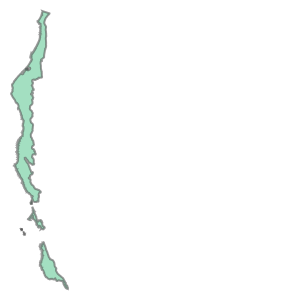

In [5]:
print(ca_eco_gdf.loc[0])

ca_eco_gdf.loc[0].geometry

**In Python, geometries consist of points, lines, or polygons**
* **Shapefiles** store geometric information
* **```geopandas```** helps import shapefiles into an easy, tabular format
* The **```shapely```** library is what ```geopandas``` uses to handle these geometry objects

The ```geopandas``` library can be thought of as a geometric ```pandas```.  Compare ```pandas```, ```geopandas```, and ```xarray``` briefly:

<table>
  <style> th {font-size:16px; color:red; align:"left"} td {font-size:12px; align:"left"} table {width:100%} </style>
  <tr>
    <td>PACKAGE</th>
    <th>pandas</th>
    <th>geopandas</th>
    <th>xarray</th> 
  </tr>
  <tr>
    <td>PURPOSE</td>
    <td><li>Tabular (2D) data</li></td>
    <td><li>Shapefiles (points, lines, polygons)</li></td>
    <td><li>2D or higher dimensional data (often, NetCDF files)</li></td> 
  </tr>
  <tr>
    <td>DATA TYPES</td>
    <td><li>Series (1D)</li><li>DataFrame (2D, typically dictionary of Series objects)</li></td>
    <td><li>GeoSeries (one set of points/lines/polygons)</li><li>GeoDataFrame (tabular data structure containing 1 or more GeoSeries)</li></td>
    <td><li>DataArray (one variable)</li><li>DataSet (multiple variables)</li></td> 
  </tr>
</table>

**Methods like ```.head()``` exist for GeoDataFrames:**

In [6]:
ca_eco_gdf.head()

,US_L3CODE,US_L3NAME,NA_L3CODE,NA_L3NAME,NA_L2CODE,NA_L2NAME,NA_L1CODE,NA_L1NAME,STATE_NAME,EPA_REGION,L3_KEY,L2_KEY,L1_KEY,geometry
0,1,Coast Range,7.1.8,Coast Range,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,California,10,1 Coast Range,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,(POLYGON ((-2284145.645799998 1942003.85980000...
1,13,Central Basin and Range,10.1.5,Central Basin and Range,10.1,COLD DESERTS,10,NORTH AMERICAN DESERTS,California,10,13 Central Basin and Range,10.1 COLD DESERTS,10 NORTH AMERICAN DESERTS,"(POLYGON ((-1856589.398599999 1762342.1763, -1..."
2,14,Mojave Basin and Range,10.2.1,Mojave Basin and Range,10.2,WARM DESERTS,10,NORTH AMERICAN DESERTS,California,9,14 Mojave Basin and Range,10.2 WARM DESERTS,10 NORTH AMERICAN DESERTS,"POLYGON ((-1899479.7774 1806588.553400001, -18..."
3,4,Cascades,6.2.7,Cascades,6.2,WESTERN CORDILLERA,6,NORTHWESTERN FORESTED MOUNTAINS,California,10,4 Cascades,6.2 WESTERN CORDILLERA,6 NORTHWESTERN FORESTED MOUNTAINS,POLYGON ((-2131525.308100002 2400780.837399999...
4,5,Sierra Nevada,6.2.12,Sierra Nevada,6.2,WESTERN CORDILLERA,6,NORTHWESTERN FORESTED MOUNTAINS,California,9,5 Sierra Nevada,6.2 WESTERN CORDILLERA,6 NORTHWESTERN FORESTED MOUNTAINS,"POLYGON ((-2069803.4551 2205701.5616, -2069451..."


**The quick ```.plot()``` syntax works, as well:**

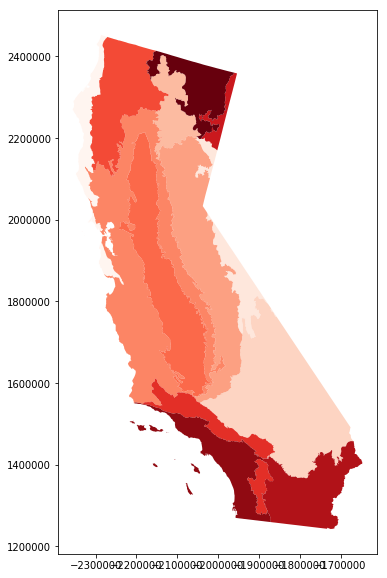

In [7]:
ca_eco_gdf.plot(figsize=(7,10), cmap='Reds')

**Now extract the row corresponding to the Sierra Nevada ecoregion:**

In [8]:
ca_eco_sierras = ca_eco_gdf.iloc[4]
#ca_eco_sierras = ca_eco_gdf.loc[4]
print(ca_eco_sierras)

US_L3CODE                                                     5
US_L3NAME                                         Sierra Nevada
NA_L3CODE                                                6.2.12
NA_L3NAME                                         Sierra Nevada
NA_L2CODE                                                   6.2
NA_L2NAME                                    WESTERN CORDILLERA
NA_L1CODE                                                     6
NA_L1NAME                       NORTHWESTERN FORESTED MOUNTAINS
STATE_NAME                                           California
EPA_REGION                                                    9
L3_KEY                                         5  Sierra Nevada
L2_KEY                                  6.2  WESTERN CORDILLERA
L1_KEY                       6  NORTHWESTERN FORESTED MOUNTAINS
geometry      POLYGON ((-2069803.4551 2205701.5616, -2069451...
Name: 4, dtype: object


**Double check this by inspecting its ```.geometry```:**

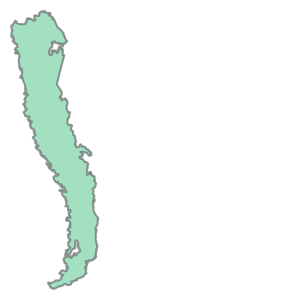

In [9]:
ca_eco_sierras.geometry
# could also type:  ca_eco_sierras['geometry']

**To plot this on a map, you'll need to convey the projection information.**

One way to do this:  Use projection info from the associated ```.prj``` file to create the shapefile's cartopy crs:

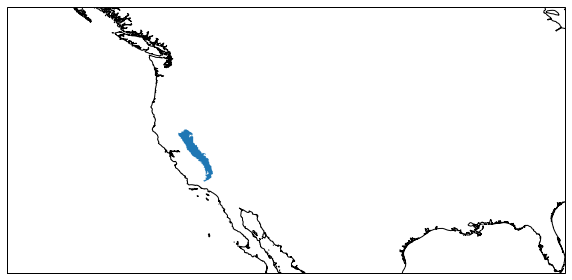

In [10]:
map_crs = cartopy.crs.PlateCarree()

ca_eco_crs = cartopy.crs.AlbersEqualArea(central_longitude=-96.0, 
                                         central_latitude=23.0,
                                         false_easting=0.0,
                                         false_northing=0.0,
                                         standard_parallels=[29.5,45.5])

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111, projection=map_crs)
ax.coastlines(resolution='10m')
ax.set_extent([220,280,25,50])

ax.add_geometries([ca_eco_sierras.geometry], crs=ca_eco_crs)

Another way to do this:  Use the original ```GeoDataFrame```'s ```.crs``` (coordinate reference system).

In [11]:
print(ca_eco_gdf.crs)

{'init': 'epsg:5070'}


**This is called an EPSG projection (EPSG = European Petroluem Survey Group)**  
This can be used *directly* in cartopy, allowing you to skip the long-winded projection step.

*NOTE:  USING THE EPSG FUNCTION REQUIRES AN ACTIVE INTERNET CONNECTION*

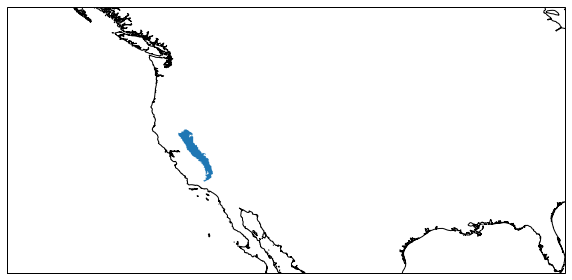

In [12]:
map_crs = cartopy.crs.PlateCarree()

ca_eco_crs = cartopy.crs.epsg(5070) # use epsg code from ca_eco_gdf.crs

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111, projection=map_crs)
ax.coastlines(resolution='10m')
ax.set_extent([220,280,25,50])

ax.add_geometries([ca_eco_sierras.geometry], crs=ca_eco_crs)

## Now use another shapefile to add the California state outline

**Use the states and provinces shapefile from Natural Earth Data**  
Download at [https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-1-states-provinces/](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-1-states-provinces/)

In [13]:
states_provinces_gdf = geopandas.read_file(
    '../data/shapefiles/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp')

In [14]:
states_provinces_gdf.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry
0,Admin-1 scale rank,3,ARG-1309,1309,AR-E,None,AR,1,Entre RÃ­os,Entre-Rios,...,Entre RÃ­os,Entre RÃ­os,Entre RÃ­os,Ð­Ð½ÑÑÐµ-Ð Ð¸Ð¾Ñ,Entre RÃ­os,Entre RÃ­os eyaleti,Entre RÃ­os,æ©ç¹é·éå¥¥æ¯ç,1159309789,POLYGON ((-58.20011185221784 -32.4471299123597...
1,Admin-1 scale rank,6,URY-8,8,UY-PA,None,UY,1,PaysandÃº,None,...,PaysandÃº,PaysandÃº,PaysandÃº,ÐÐ°Ð¹ÑÐ°Ð½Ð´Ñ,PaysandÃº,Paysandu DepartmanÄ±,PaysandÃº,æ´¾æ¡æç,1159307733,POLYGON ((-58.20012361999997 -32.4472010419999...
2,Admin-1 scale rank,3,PAK-1114,1114,PK-SD,None,PK,1,Sind,Sindh,...,Sindh,Sindh,Sind,Ð¡Ð¸Ð½Ð´,Sindh,Sind Eyaleti,Sindh,ä¿¡å¾·ç,1159309351,(POLYGON ((68.18303772804984 23.84215840655192...
3,Admin-1 scale rank,2,IND-3264,3264,IN-GJ,None,IN,1,Gujarat,None,...,Gujarat,GudÅºarat,Gujarate,ÐÑÐ´Ð¶Ð°ÑÐ°Ñ,Gujarat,Gucerat,Gujarat,å¤åæç¹é¦,1159314179,"POLYGON ((68.18300782500012 23.84208720600007,..."
4,Admin-1 scale rank,2,IDN-1185,1185,ID-KI,None,ID,5,Kalimantan Timur,Kaltim,...,Oost-Kalimantan,Borneo Wschodnie,Kalimantan Oriental,ÐÐ¾ÑÑÐ¾ÑÐ½ÑÐ¹ ÐÐ°Ð»Ð¸Ð¼Ð°Ð½ÑÐ°Ð½,Kalimantan Timur,DoÄu Kalimantan,ÄÃ´ng Kalimantan,æ±å éæ¼ä¸¹ç,1159310009,(POLYGON ((117.7036079039552 4.163414542001791...


**Use the ```np.where()``` function to find the index where the ```name``` column is California:**

In [15]:
np.where(states_provinces_gdf.name=='California')

(array([1313]),)

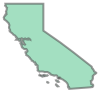

In [16]:
ca_state_data = states_provinces_gdf.loc[1313]
ca_state_data.geometry

**Note the crs of this shapefile is epsg 4326**  
* An EPSG of 4326 corresponds to the [World Geodetic System 1984 (WGS84)](https://en.wikipedia.org/wiki/World_Geodetic_System) datum, the standard reference system in cartography, geodesy, and satellite nativation.
* An EPSG will not be recognized by ```cartopy.crs.epsg()``` and is equivalent to ```cartopy.crs.PlateCaree()```.

In [17]:
print(states_provinces_gdf.crs)

{'init': 'epsg:4326'}


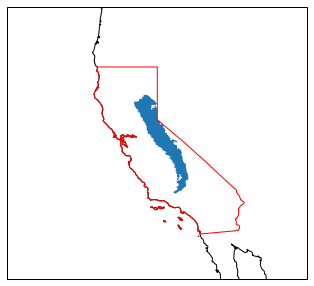

In [18]:
map_crs = cartopy.crs.Robinson(central_longitude=240)
ca_eco_crs = cartopy.crs.epsg(5070)
ca_state_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111, projection=map_crs)
ax.coastlines(resolution='10m')
ax.set_extent([230,250,30,45])

ax.add_geometries([ca_eco_sierras.geometry], crs=ca_eco_crs)
ax.add_geometries([ca_state_data.geometry], crs=ca_state_crs, facecolor='None', edgecolor='red')

**Geometries have a lot of attributes associated with them:**
* ```.bounds```:  the bounding coordinates of a shapefile
* ```.area```:  the area of a geometry
* ```.length```:  the length of a geometry

In [19]:
lon_lo, lat_lo, lon_hi, lat_hi = ca_state_data.geometry.bounds

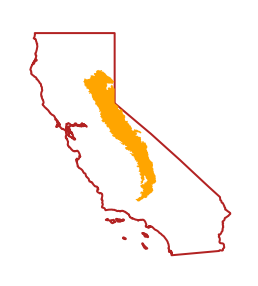

In [20]:
map_crs = cartopy.crs.Robinson(central_longitude=240)
ca_eco_crs = cartopy.crs.epsg(5070)
ca_state_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111, projection=map_crs)
ax.set_extent([lon_lo-1,lon_hi+1,lat_lo-1,lat_hi+1])

ax.add_geometries([ca_state_data.geometry], crs=ca_state_crs, facecolor='None', edgecolor='firebrick', linewidth=2)
ax.add_geometries([ca_eco_sierras.geometry], crs=ca_eco_crs, facecolor='orange')

ax.outline_patch.set_visible(False)
#ax.coastlines(resolution='10m', lw=2)

### Other useful tricks

### 1.  What percent area of California does this Sierra Nevadas ecoregion take up?
Use the ```.area``` method:

In [21]:
ca_state_data.geometry.area

41.65163687669386

**The geometries you're comparing must have the same projection.  To compare to the Sierras region directory, project it onto EPSG 4326 using the ```.to_crs()``` method:**

In [22]:
ca_eco_gdf_epsg4326 = ca_eco_gdf.to_crs({'init': 'epsg:4326'})
ca_eco_sierras_epsg4326 = ca_eco_gdf_epsg4326.loc[4]

**Then calculate the ratio of the areas:**

In [23]:
(ca_eco_sierras_epsg4326.geometry.area/ca_state_data.geometry.area) * 100.

12.83489437014111

### 2. Calculate whether a given geometry *contains* a point or *intersects* with a line**

**Simple example:  does the Sierras ecoregion fall within the state of California, True or False?**

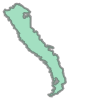

In [24]:
ca_eco_sierras_epsg4326.geometry

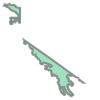

In [25]:
ca_eco_cbr_epsg4326 = ca_eco_gdf_epsg4326.loc[1]
ca_eco_cbr_epsg4326.geometry

In [26]:
ca_state_data.geometry.overlaps(ca_eco_sierras_epsg4326.geometry)

True

In [27]:
ca_eco_sierras_epsg4326.geometry.overlaps(ca_eco_cbr_epsg4326.geometry)

False

In [28]:
ca_eco_sierras_epsg4326.geometry.touches(ca_eco_cbr_epsg4326.geometry)

True

**Other natural language comparisons can be used (see the [binary predicates](https://shapely.readthedocs.io/en/stable/manual.html#binary-predicates) section of the ```shapely``` documentation):**

* ```object.contains(other)```
* ```object.crosses(other)```
* ```object.disjoin(other)```
* ```object.intersects(other)```
* ```object.overlaps(other)```
* ```object.touches(other)```

**Open a file with national parks and protected lands (in areas, lines, and points separately):**

In [29]:
parks_areas_gdf = geopandas.read_file('../data/shapefiles/ne_10m_parks_and_protected_lands/ne_10m_parks_and_protected_lands_area.shp')
parks_lines_gdf = geopandas.read_file('../data/shapefiles/ne_10m_parks_and_protected_lands/ne_10m_parks_and_protected_lands_line.shp')
parks_points_gdf = geopandas.read_file('../data/shapefiles/ne_10m_parks_and_protected_lands/ne_10m_parks_and_protected_lands_point.shp')

**Concatenate the areas and lines into the same GeoDataFrame for easier handling:**

In [30]:
parks_areas_lines_gdf = pd.concat([parks_areas_gdf, parks_lines_gdf])
parks_areas_lines_gdf.head()

,unit_code,unit_name,unit_type,nps_region,scalerank,featurecla,note,name,geometry
0,HAVO,Hawai'i Volcanoes NP,National Park,Pacific West,3,National Park Service,None,Hawai'i Volcanoes,"POLYGON ((-155.0587158203125 19.366943359375, ..."
1,CANA,Canaveral NS,National Seashore,Southeast,5,National Park Service,None,Canaveral NS,"POLYGON ((-80.6270751953125 28.65087890625, -8..."
2,SAMO,Santa Monica Mountains NRA,National Recreation Area,Pacific West,8,National Park Service,None,Santa Monica Mountains,"POLYGON ((-118.4315592447917 34.1336669921875,..."
3,CHIS,Channel Islands NP,National Park,Pacific West,5,National Park Service,None,Channel Islands,(POLYGON ((-119.0289639469999 33.4839378140001...
4,PORE,Point Reyes NS,National Seashore,Pacific West,5,National Park Service,None,Point Reyes,POLYGON ((-122.7147623697917 37.95817057291667...


**Loop through the large and small parks and store those that share space with the Sierras ecoregion OR with California generally:**

In [31]:
large_parks_in_sierras = []
large_parks_in_ca = []
for i,row in parks_areas_lines_gdf.iterrows():
    if row.geometry != None:
        if ca_eco_sierras_epsg4326.geometry.intersects(row.geometry):
            large_parks_in_sierras.append(row)
        if ca_state_data.geometry.intersects(row.geometry):
            large_parks_in_ca.append(row)

small_parks_in_sierras = []
small_parks_in_ca = []
for i,row in parks_points_gdf.iterrows():
    if row.geometry != None:
        if ca_eco_sierras_epsg4326.geometry.intersects(row.geometry):
            small_parks_in_sierras.append(row)
        if ca_state_data.geometry.intersects(row.geometry):
            small_parks_in_ca.append(row)

large_parks_sierras_gdf = geopandas.GeoDataFrame(large_parks_in_sierras)
small_parks_sierras_gdf = geopandas.GeoDataFrame(small_parks_in_sierras)
large_parks_ca_gdf = geopandas.GeoDataFrame(large_parks_in_ca)
small_parks_ca_gdf = geopandas.GeoDataFrame(small_parks_in_ca)

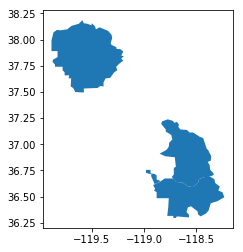

In [32]:
large_parks_sierras_gdf.plot()

**The result is 4 lists, converted to data frames, containing large and small National Parks and protected land info as rows:**

In [33]:
large_parks_sierras_gdf

,unit_code,unit_name,unit_type,nps_region,scalerank,featurecla,note,name,geometry
16,SEQU,Sequoia NP,National Park,Pacific West,3,National Park Service,None,Sequoia,POLYGON ((-118.9144287109375 36.61092122395834...
17,KICA,Kings Canyon NP,National Park,Pacific West,4,National Park Service,None,Kings Canyon,(POLYGON ((-118.880615234375 36.62540690104167...
23,YOSE,Yosemite NP,National Park,Pacific West,3,National Park Service,None,Yosemite,"POLYGON ((-119.5421956380208 38.1513671875, -1..."


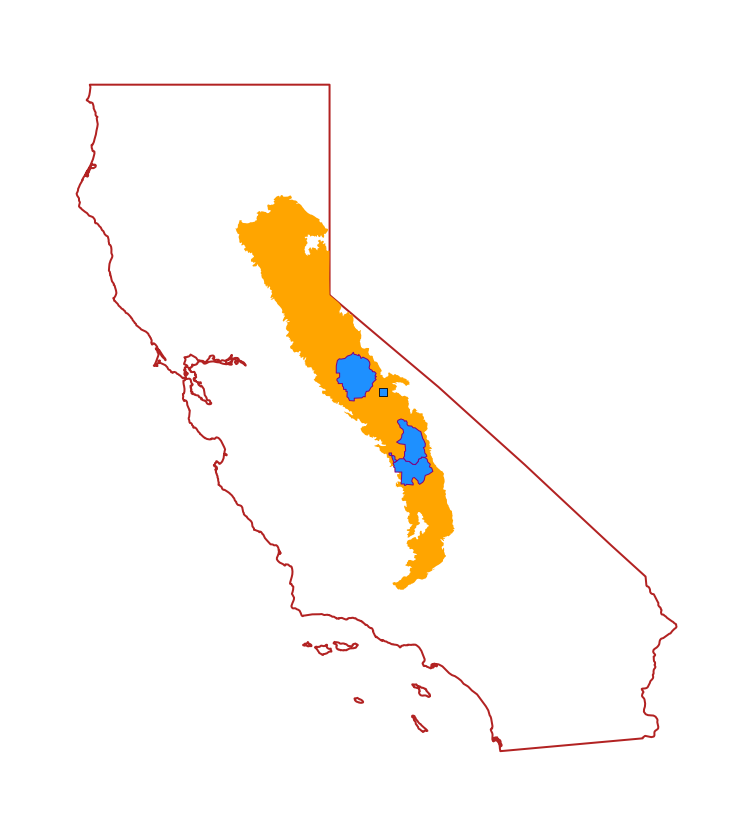

In [34]:
map_crs = cartopy.crs.Robinson(central_longitude=240)
ca_eco_crs = cartopy.crs.epsg(5070)
ca_state_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection=map_crs)
ax.set_extent([lon_lo-1,lon_hi+1,lat_lo-1,lat_hi+1])

ax.add_geometries([ca_state_data.geometry], crs=ca_state_crs, facecolor='None', edgecolor='firebrick', linewidth=2)
ax.add_geometries([ca_eco_sierras.geometry], crs=ca_eco_crs, facecolor='orange')

ax.add_geometries(large_parks_sierras_gdf.geometry.values, crs=ca_state_crs, facecolor='dodgerblue', edgecolor='purple')

ax.scatter(small_parks_sierras_gdf.geometry.x.values, 
           small_parks_sierras_gdf.geometry.y.values,
           transform=ca_state_crs, s=75, marker='s', c='dodgerblue', edgecolor='0.1', zorder=10)

ax.outline_patch.set_visible(False)

Download the Pacific Crest Trail as a shapefile from the Forest Service:  https://www.fs.usda.gov/detail/pct/home/?cid=stelprdb5322473

In [35]:
pct_gdf = geopandas.read_file('../data/shapefiles/PacificCrestTrail/PacificCrestTrail.shp')
print(pct_gdf.crs)
pct_gdf.head()

{'init': 'epsg:3310'}


,OWNERTYPE,OWNERNAME,DESIGNATIO,DESIGNAT_1,MANAGEMENT,MANAGEME_1,MANAGEME_2,STATE,REV_DATE,DATA_SOURC,geometry
0,State,CA State Dept of Transportation,Road Right of Way,Interstate Highway 10,None,None,None,CA,2006-11-10,03,"LINESTRING (305547.62 -449112.76, 305552.03 -4..."
1,County,Riverside County Dept of Transportation,Road Right of Way,Tamarack Road,None,None,None,CA,2006-11-10,03,"LINESTRING (305554.03 -449076.9, 305551.44 -44..."
2,Private,Seymour Lazar,None,None,None,None,None,CA,2006-11-10,03,"LINESTRING (305262.5 -448447.42, 305262.24 -44..."
3,Bureau of Land Management,CA Desert District - Palm Springs South Coast ...,None,None,None,None,None,CA,2006-11-10,03,"LINESTRING (304862.25 -448009.33, 304862.7 -44..."
4,Private,Metropolitan Water District of So Cal,None,None,None,None,None,CA,2006-11-10,03,"LINESTRING (304856.66 -447911.66, 304856.8 -44..."


/Users/baird/miniconda3/lib/python3.6/site-packages/cartopy/mpl/feature_artist.py:163: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


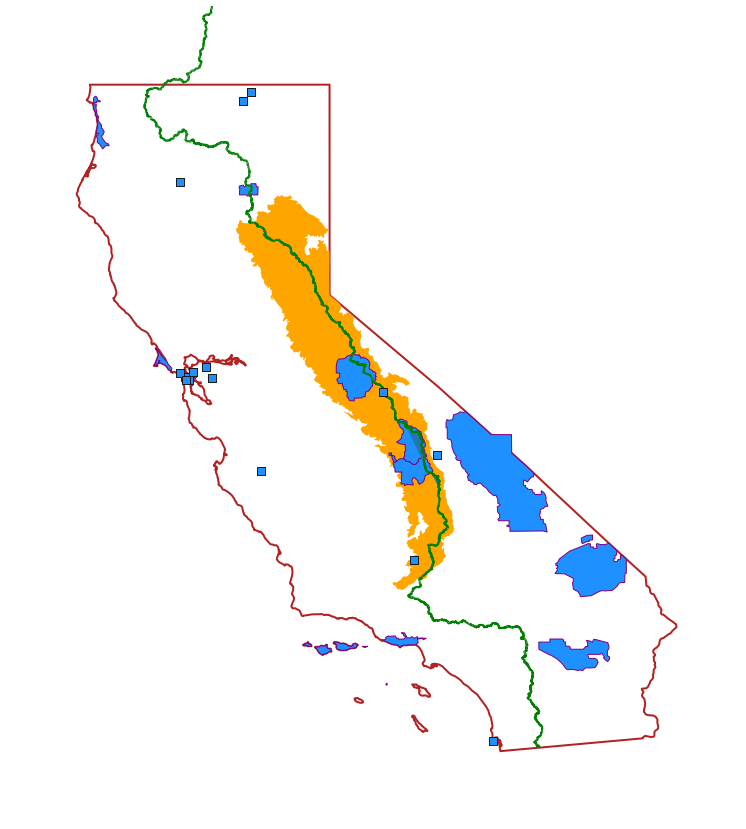

In [36]:
map_crs = cartopy.crs.Robinson(central_longitude=240)
ca_eco_crs = cartopy.crs.epsg(5070)
ca_pct_crs = cartopy.crs.epsg(3310)
ca_state_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111, projection=map_crs)

ax.add_geometries([ca_state_data.geometry], crs=ca_state_crs, facecolor='None', edgecolor='firebrick', linewidth=2)
ax.add_geometries([ca_eco_sierras.geometry], crs=ca_eco_crs, facecolor='orange')

ax.add_geometries(large_parks_ca_gdf.geometry.values, crs=ca_state_crs, facecolor='dodgerblue', edgecolor='purple')

ax.scatter(small_parks_ca_gdf.geometry.x.values, 
           small_parks_ca_gdf.geometry.y.values,
           transform=ca_state_crs, s=75, marker='s', c='dodgerblue', edgecolor='0.1', zorder=10)

ax.add_geometries(pct_gdf.geometry.values, crs=ca_pct_crs, edgecolor='green', lw=2)

ax.set_extent([lon_lo-1,lon_hi+1,lat_lo-1,lat_hi+1])
ax.outline_patch.set_visible(False)